<a href="https://colab.research.google.com/github/mini1666/MACHINE-VISION/blob/main/Lab_Task_1_21BAI1666.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ASSIGNMENT-1(A)


TASK 1 : BASIC IMAGE STATISTICS AND COLOR SPACE CONVERSION


Objective:
Compute basic statistics and convert an image into different color spaces.
Steps:
1. Read the image: Load an Image using OpenCV.
2. Compute Basic Statistics: Calculate the mean, standard deviation, and histogram of each color channel.
3. Convert Color Spaces: Convert the image to HSV and Lab color spaces and display the results.


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


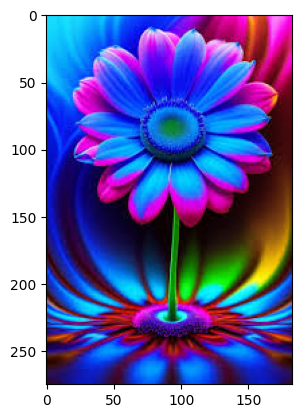

In [16]:
#  1.READ THE IMAGE

image = cv2.imread("mv_1.jpeg")
image_rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow( image)

Red Channel:
Mean: 149.99423745653255
Standard Deviation: 95.94167402791105


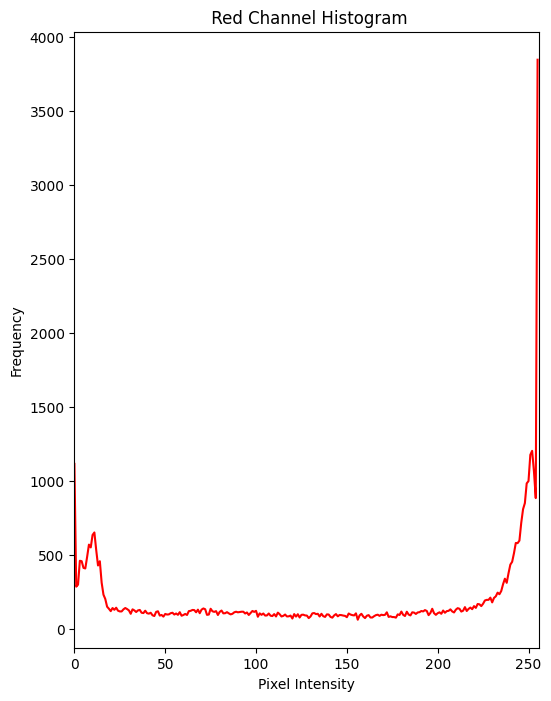

In [17]:
# 2.COMPUTE BASIC STATISTICS

channels = cv2.split(image)
color_names = ['Blue','Green','Red']

for i, channel in enumerate(channels) :
  mean = np.mean(channel)
  std_dev= np.std(channel)
histogram,_= np.histogram(channel, bins=256 ,range=[0, 256])

print(f'{color_names[i]} Channel:')
print(f'Mean: {mean}')
print(f'Standard Deviation: {std_dev}')

# Plot the histogram

plt.figure(figsize=(6, 8))

plt.title(f' {color_names[i]} Channel Histogram' )
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.plot(histogram, color=color_names[i].lower())
plt.xlim([0, 256])
plt.show()


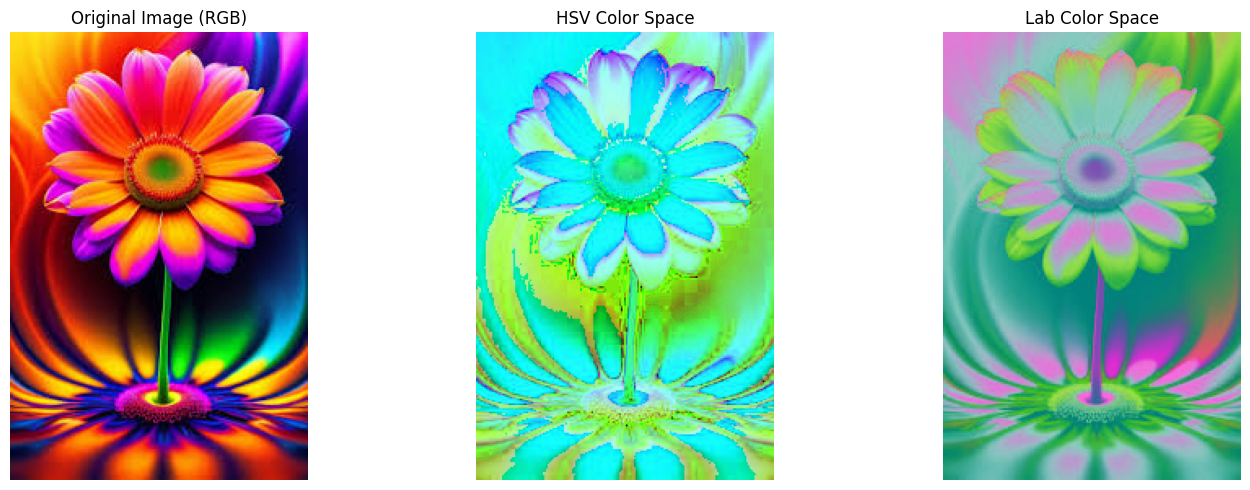

In [18]:
# 3. CONVERT TO ,HSV AND LAB IMAGES

hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)

# Display the original, HSV, and Lab images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('Original Image (RGB)')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(hsv_image)
plt.title('HSV Color Space')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(lab_image)
plt.title('Lab Color Space')
plt.axis('off')

plt.tight_layout()
plt.show()


Task 2: Simple Image Segmentation Using Thresholding


Objective:
Segment an image into foreground and background using global thresholding.
Steps:
1. Read the Image: Load a grayscale image.
2. Apply Thresholding: Use a fixed threshold value to segment the image.
3. Display Results: Show the original and segmented images.


In [19]:
# 1.READ THE IMAGE LOAD GRAYSCALE IMAGE
image = cv2.imread("MV.1.jpg", 0)




In [27]:
# 2. APPLY FIXED THRESHOLDING
threshold_value = 128
height, width = image.shape

segmented_image = np.zeros((height, width), dtype=np.uint8)
for i in range(height):
 for j in range(width):
   if image[i, j] > threshold_value:
           segmented_image[i, j] = 255
   else:
          segmented_image[i, j] = 0
# Set to black if the pixel value is below or equal to



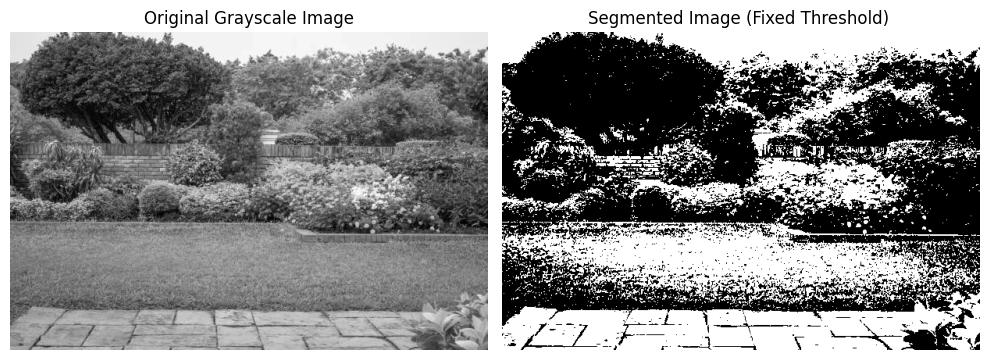

In [28]:
#  3. DISPLAY THE ORIGNAL AND SEGMENTED IMAGES
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Grayscale Image' )
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap='gray')
plt.title('Segmented Image (Fixed Threshold) ')
plt.axis('off')
plt.tight_layout()
plt.show()

Task 3: Color-Based Segmentation


Objective:
Segment specific objects in an image based on their color.
Steps:
1. Read the image: Load an image with objects of different colors.
2. Convert to HSV: Convert the image to HSV color space.
3. Apply Color Thresholding: Use color thresholds to segment objects of a specific color.
4. Display Results: Show the original and segmented images

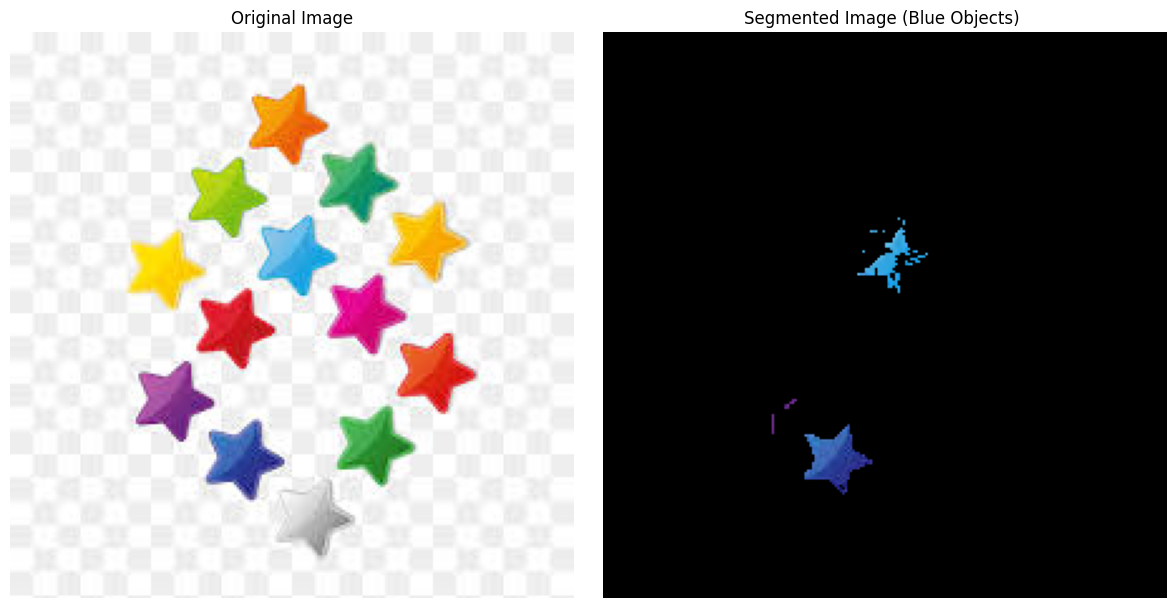

In [29]:
#  1. LOAD THE IMAGE
image = cv2.imread("coloredobjects.jpeg")

#  2.CONVERT TO HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# 3.APPLY TO COLOUR THRRESHOLDING

lower_blue = np.array([100, 150, 0])
upper_blue = np.array([140, 255, 255])

mask = np.zeros(hsv_image.shape[:2], dtype=np.uint8)

for i in range(hsv_image.shape[0]):
  for j in range(hsv_image.shape[1]):
       if lower_blue[0] <= hsv_image[i, j, 0] <= upper_blue[0] and \
          lower_blue[1] <= hsv_image[i, j, 1] <= upper_blue[1] and \
          lower_blue[2] <= hsv_image[i, j, 2] <= upper_blue[2]:
            mask[i, j] = 255

segmented_image = cv2.bitwise_and(image, image, mask=mask)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
segmented_image_rgb = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title( 'Original Image' )
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image_rgb)
plt.title('Segmented Image (Blue Objects) ')
plt.axis('off')

plt.tight_layout()
plt.show()

ASSIGNMENT -1(B)

Task 1: Image Negative Transformation

Objective: Create an image negative using Python.
Steps
1. Load a grayscale image.
2. Apply the image negative transformation.
3. Display the original and the negative image.


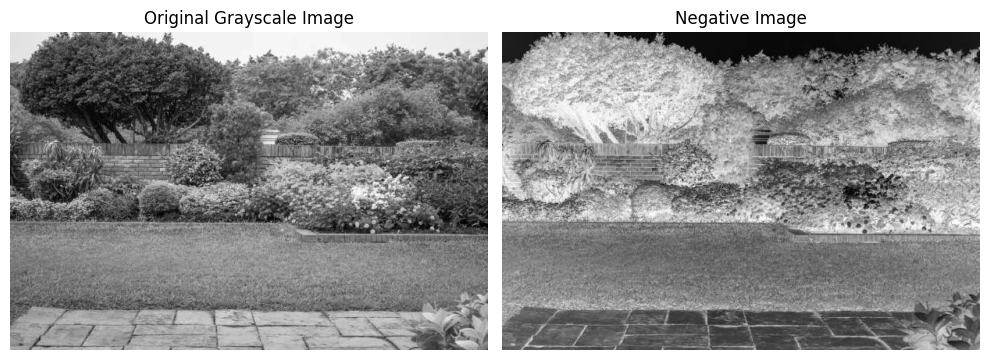

In [30]:
# Step 1: Load the grayscale image
image = cv2.imread("MV.1.jpg", 0)
# Step 2: Apply the image negative transformation
height, width = image.shape
negative_image = np.zeros((height, width), dtype=np.uint8)

# Perform the negative transformation
for i in range(height):
    for j in range(width):
       negative_image[i, j] = 255 - image[i, j]

# Step 3: Display the original and negative images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Grayscale Image' )
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_image, cmap='gray')
plt.title('Negative Image')
plt.axis('off')

plt.tight_layout()
plt.show()


Task 2: Gamma Correction

Objective: Apply gamma correction with different gamma values.
Steps:
1. Load a grayscale image.
2. Apply gamma correction with y=0.5\gamma = 0.5y=0.5, y=1.0\gamma = 1.0y-1.0, and y \gamma 2.0y-2.0.
3. Display the original and the gamma-corrected images.


In [41]:
# Step 1: Load the grayscale image
image = cv2.imread("image.jpeg", 0)




In [42]:
def apply_gamma_correction(image, gamma):
    normalized_image = image / 255.0

          gamma_corrected = np.power(normalized_image, gamma)

gamma_corrected = np.uint8(gamma_corrected * 255)
return gamma_corrected

# Step 2: Apply gamma correction with different gamma values
gamma_values = [0.5, 1.0, 2.0]
gamma_corrected_images = []

for gamma in gamma_values:
  corrected_image = apply_gamma_correction(image, gamma)
  gamma_corrected_images.append(corrected_image)

# Step 3: Display the original and gamma-corrected images
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title( 'Original Grayscale Image' )
plt.axis('off')

for i, gamma in enumerate(gamma_values):
 plt.subplot(2, 2, i + 2)
 plt.imshow(gamma_corrected_images[i], cmap='gray')
 plt.title(f'Gamma = {gamma}')
 plt.axis('off')
 plt.tight_layout()
 plt.show()

NameError: name 'normalized_image' is not defined

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Task 3: Log Transform

Objective: Apply log transformation to enhance an image.
Steps:
1. Load a grayscale image.
2. Apply log transformation.
3. Display the original and the log-transformed image.


In [ ]:
def apply_log transformation(image, c=255.@):
normalized_image = image / 255.0

log_transformed = c * np.logip(normalized_image)
log transformed = np.uint8(log_ transformed)
return log transformed

# Step 1: Load the grayscale image
image = cv2.imread( » 0)
# Step 2: Apply Log transformation
log _transformed_image = apply _log transformation( image)

# Step 3: Display the original and Log-transformed images
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray' )
plt.title('Original Grayscale Image’ )
plt.axis('‘off')

plt.subplot(1, 2, 2)

plt.imshow(log transformed_image, cmap='gray' )
plt.title('Log-Transformed Image’)
plt.axis('off')

plt.tight_layout()
plt.show()



Task 4: Compare Transformations

Objective: Compare the effects of different transformations.
Steps:
1. Load a grayscale image.
2. Apply image negative, gamma correction (y-2.0\gamma 2.0y-2.0), and log transformat
3. Display the original image alongside the transformed images for comparison.


In [ ]:
 Plot images side by side using subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[@].imshow(negative_image, cmap = ‘gray')
axes[@].set_title('negative_image' )
axes[@].axis('off')

axes[1].imshow(gamma_corrected_images[@], cmap = ‘gray')
axes[1].set_title('gamma_corrected_images')
axes[1].axis('off')
axes[2].imshow(log transformed_image, cmap = '‘gray')
axes[2].set_title('log_ transformed_image’ )
axes[2].axis('off')

plt.tight_layout()
plt.show()


Task 5: Apply Transformations to Color Images

Objective: Apply the transformations to a color image by processing each channel separately.
Steps:
1. Load a color image.
2. Split the image into its R, G, and B channels.
3. Apply image negative, gamma correction, and log transformation to each channel.
4. Merge the channels back together.
5. Display the original and the transformed images.

In [ ]:
# Step 1: Load the color image
image = cv2.imread("colored_objects.png")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Step 2: Split the image into R, G, and B channels
r_channel, g_channel, b_channel = cv2.split(image_rgb)

def apply_gamma_correction(channel, gamma):
normalized_channel = channel / 255.9
gamma_corrected = np.power(normalized_channel, gamma)
return np.uint8(gamma_corrected * 255)

def apply_log transformation(channe1) :
normalized_channel = channel / 255.@
log transformed = 255 * np.logip(normalized_channel)
return np.uint8(log_transformed)

def apply_image_negative(channel):
return 255 - channel

# Define gamma values for gamma correction
gamma_values = [@.5, 1.0, 2.0]

# Apply transformations to each channel
transformed_channels = {

'negative': {
'R': apply_image_negative(r_channel),
'G': apply_image_negative(g_channel),
'B': apply_image negative(b_channel),
},

'gamma_0.5': {
'R': apply_gamma_correction(r_channel, 0.5),
'G': apply_gamma_correction(g_channel, 0.5),
'B': apply_gamma_correction(b_channel, 0.5),

},

'gamma_1.0': {
'R': apply_gamma_correction(r_channel, 1.0),
'G': apply_gamma_correction(g_channel, 1.0),
'B': apply_gamma_correction(b_channel, 1.0),

},

'gamma_2.0': {
'R': apply_gamma_correction(r_channel, 2.0),
'G': apply_gamma_correction(g_channel, 2.0),
'B': apply_gamma_correction(b_channel, 2.@),

},

'log': {
'R': apply_log_transformation(r_channe1),
'G': apply_log_transformation(g_channel),
'B': apply_log_transformation(b_channel),

}
}

def merge_channels(r, g, b):
return cv2.merge([r, g, b])
# Display the original and transformed images
plt.figure(figsize=(12, 10))

plt.subplot(3, 3, 1)
plt.imshow(image_rgb)
plt.title( 'Original Image' )
plt.axis('off')

# Display the negative transformation

negative_image = merge_channels(transformed_channels|[ 'negative' ]['R'],
transformed_channels['negative']['G'],
transformed_channels[ 'negative']['B'])

plt.subplot(3, 3, 2)

plt.imshow(negative_image)

plt.title('Negative Transformation' )

plt.axis('off')

# Display gamma corrections
for i, gamma in enumerate([@.5, 1.0, 2.0], start=3):
gamma_image = merge _channels(transformed_channels[f'gamma_{gamma}']['R'],
transformed_channels[f'gamma_{gamma}']['G'],
transformed_channels[f'gamma_{gamma}‘][‘B'])
plt.subplot(3, 3, i)
plt.imshow(gamma_image)
plt.title(f'Gamma {gamma}' )
plt.axis('off')

# Display log transformation

log_image = merge_channels(transformed_channels['log']['R'],
transformed_channels['log']['G'],
transformed_channels['log']['B'])

plt.subplot(3, 3, 6)

plt.imshow(log image)

plt.title('Log Transformation' )

plt.axis('off')

plt.tight_layout()
plt.show()


ASSIGNMENT -3(C)

IMAGE ENHANCEMENT -HISTOGRAM EQUALIZATION





Task 1: Introduction to Histogram Equalization

Objective: Understand the basics of histogram equalization and its impact on image contrast.

Load and Display an Image:

Load a grayscale image and display it.

Plot the histogram of the original image to show the distribution of pixel intensities.

Calculate and Plot Histogram:

Calculate the histogram of the image manually.

Plot the histogram to visualize the pixel intensity distribution.

Calculate Cumulative Distribution Function (CDF):

Compute the CDF from the histogram.

Normalize the CDF to the range [0, 255].

Apply Histogram Equalization:

Map the original pixel values to equalized pixel values using the CDF.

Display the equalized image and plot its histogram.

Compare Results:

Compare the original and equalized images.

Discuss the differences in visual quality and histogram distributions.

















In [ ]:
# Step 1: Load and DispLay an Image
image = cv2.imread("image.png", @) # Load the image in grayscale mode

# Display the original image
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray' )
plt.title('Original Grayscale Image’ )
plt.axis(‘off')

# Plot the histogram of the original image

plt.subplot(1, 2, 2)

plt.hist(image.ravel(), bins=256, range=[@, 256], color="black')
plt.title( ‘Histogram of Original Image’)

plt.xlabel('Pixel Intensity')

plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
histogram, bins = np.histogram(image.flatten(), bins=256, range=[9, 256])

# Plot the histogram
plt.figure(figsize=(6, 4))
plt.plot(histogram, color='black')
plt.title('Calculated Histogram’ )
plt.xlabel('Pixel Intensity’)
plt.ylabel(' Frequency’)

plt.show()


In [ ]:
# Step 3: Calculate Cumulative Distribution Function (CDF)
cdf = np.cumsum(histogram)
cdf_normalized = cdf * (255 / cdf[-1])

# Step 4: Apply Histogram Equalization
# Create a Lookup table to map old pixel values to new values
equalized_image = np.interp(image.flatten(), bins[:-1], cdf_normalized)

# Reshape the equalized image to the original shape
equalized_image = equalized_image.reshape(image.shape) .astype(np.uints8)

# Display the equalized image
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plt.imshow(equalized_image, cmap="gray')
plt.title('Equalized Image')
plt.axis(‘off')

# PLot the histogram of the equalized image

plt.subplot(1, 2, 2)

plt.hist(equalized_image.ravel(), bins=256, range=[@, 256], color='black')
plt.title('Histogram of Equalized Image' )

plt.xlabel('Pixel Intensity’)

plt.ylabel(' Frequency’ )

plt.tight_layout()
plt.show()

In [ ]:
# Step 5: Compare Results
print("Original image histogram range: ", np.min(image), "to", np.max(image) )
print("Equalized image histogram range: ", np.min(equalized_image), "to", np.max(equalized_imée


Task 2: Comparing Histogram Equalization Techniques

Objective: Compare standard histogram equalization with adaptive histogram equalization.

Implement Adaptive Histogram Equalization (AHE):

Divide the image into smaller regions (tiles).

Apply histogram equalization to each tile separately.

Combine the tiles to form the final image.

Implement Contrast Limited Adaptive Histogram Equalization (CLAHE):

Enhance the AHE implementation by limiting the contrast.

Apply CLAHE to the image and display the result.

Compare Results:

Display the original image, standard histogram equalized image, AHE image, and CLAHE image side by side.

Discuss the differences in visual quality and histogram distributions.

In [ ]:

def adaptive _histogram_equalization(image, tile size):
image = np.float32(image)

tile_size = (tile_size, tile_size)
tiles = (image.shape[@] // tile_size[@], image.shape[1] // tile_size[1])

ahe_image = np.zeros_like(image)
for i in range(tiles[9]):
for j in range(tiles[1]):
y_start, y_end = i * tile_size[@], (i + 1) * tile_size[@]
x_start, x_end = j * tile_size[1], (j + 1) * tile_size[1]

tile = image[y_start:y_end, x_start:x_end]

tile_eq = cv2.equalizeHist(np.uints(tile) )

ahe_image[y_start:y_end, x_start:x_end] = np.float32(tile_eq)
return np.uint8(ahe_image)

# Apply Adaptive Histogram Equalization
tile_size = 8
ahe_image = adaptive_histogram_equalization(image, tile_size)

# Step 2: Implement Contrast Limited Adaptive Histogram Equalization (CLAHE)
def apply_clahe(image) :

clahe = cv2.createCLAHE(clipLimit=2.@, tileGridSize=(8, 8))

clahe_image = clahe.apply( image)

return clahe_image

# Apply CLAHE
clahe_image = apply_clahe(image)

# Step 3: Display the Results
plt.figure(figsize=(8, 6))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title( ‘Original Image’)
plt.axis('off')

plt.subplot(2, 2, 2)

plt.hist(image.ravel(), bins=256, range=[@, 256], color='black’)
plt.title('Histogram of Original Image’ )

plt.xlabel('Pixel Intensity’)

plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.imshow(ahe_image, cmap='gray' )
plt.title('AHE Image‘)
plt.axis(‘off')

plt.subplot(2, 2, 4)

plt.hist(ahe_image.ravel(), bins=256, range=[@, 256], color='black’')
plt.title('Histogram of AHE Image‘)

plt.xlabel('Pixel Intensity’)

plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
# Display CLAHE Image and Histogram
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plt.imshow(clahe_image, cmap='gray')
plt.title('CLAHE Image’)
plt.axis('off')

plt.subplot(1, 2, 2)

plt.hist(clahe_image.ravel(), bins=256, range=[@, 256], color='black')
plt.title('Histogram of CLAHE Image' )

plt.xlabel('Pixel Intensity’)

plt.ylabel('Frequency')

plt.tight_layout()

plt.show()

Task 3: Implementing Histogram Equalization on Color Images

Objective: Apply histogram equalization to color images.

Separate Color Channels:

Split the color image into its Red, Green, and Blue (RGB) channels.

Apply Histogram Equalization to Each Channel:

Perform histogram equalization on each color channel separately.

Reconstruct the Color Image:

Combine the equalized color channels to form the final image.

Compare Results:

Display the original and equalized color images.

Discuss the visual differences and effects of equalization on color images.


In [ ]:
def equalize_channel(channel1):
# Apply histogram equalization to a single channel
return cv2.equalizeHist (channel)
# Step 1: Load the color image
image = cv2.imread("colored_objects.png")

# Convert from BGR to RGB for correct color representation
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Step 2: Split the image into R, G, and B channels
r_channel, g_channel, b_channel = cv2.split(image_rgb)
# Apply histogram equalization to each channel
r_eq = equalize_channel(r_channel)
g_eq = equalize_channel(g_channel)
b_eq = equalize_channel(b_channel)

# Step 3: Reconstruct the color image from equalized channels
equalized_image = cv2.merge([r_eq, g_eq, b_eq])

# Display the original and equalized images
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Color Image')
plt.axis('off')

plt.subplot(1, 2, 2)
pl1t.imshow(equalized_image)
plt.title( ‘Equalized Color Image’)
plt.axis('‘off')

plt.tight_layout()
plt.show()

# Display histograms of the original and equalized images

def plot_histograms(image, title):
r, g, b = cv2.split(image)
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.hist(r.ravel(), bins=256, range=[@, 256], color='red')
plt.title(f' {title} - Red Channel Histogram' )
plt.subplot(1, 3, 2)
plt.hist(g.ravel(), bins=256, range=[@, 256], color='green')
plt.title(f'{title} - Green Channel Histogram’)
plt.subplot(1, 3, 3)
plt.hist(b.ravel(), bins=256, range=[@, 256], color="blue‘)
plt.title(f'{title} - Blue Channel Histogram’ )
plt.tight_layout()
plt.show()

plot_histograms(image_rgb, ‘Original Image’ )
plot_histograms(equalized_image, ‘Equalized Image’)


Task 4: Histogram Equalization in Different Applications

Objective: Explore the use of histogram equalization in various applications.

Medical Imaging:

Apply histogram equalization to medical images (e.g., X-rays, MRIs).

Discuss how equalization can enhance the visibility of important features.

Satellite Imagery:

Apply histogram equalization to satellite images.

Analyze how equalization improves the contrast and details in the images.

Document Scanning:

Apply histogram equalization to scanned documents.

Evaluate how equalization enhances text readability and clarity.

Night Vision:

Apply histogram equalization to night vision images.

Discuss how equalization improves the visibility of objects in low-light conditions.

In [ ]:
def equalize_hist(image) :
if len(image.shape) != 2:
raise ValueError("Input image must be grayscale.")
histogram, bins = np.histogram(image.flatten(), bins=256, range=[@, 256])
# Compute Cumulative Distribution Function (CDF)
cdf = np.cumsum(histogram)
cdf_normalized = cdf * (255 / cdf[-1])

equalized_image = np.interp(image.flatten(), bins[:-1], cdf_normalized).reshape( image. shat

return equalized_image


In [ ]:
#1, Medical Imaging
medical_image = cv2.imread("Xray.jpeg", @) # Replace with your image file

# Apply histogram equalization
equalized_medical_image = equalize_hist(medical_image)

# Display the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(medical_image, cmap="gray')
plt.title('Original Medical Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_medical_image, cmap='gray' )
plt.title( ‘Equalized Medical Image')
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# Load a satellite image
satellite_image = cv2.imread("satellite. jpeg")

satellite_image gray = cv2.cvtColor(satellite_image, cv2.COLOR_BGR2GRAY)
equalized_satellite_image = equalize_hist(satellite_image_gray)

# Display the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(satellite_image_gray, cmap='gray')
plt.title('Original Satellite Image’)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_satellite_image, cmap=‘gray' )
plt.title( ‘Equalized Satellite Image’ )
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Load a scanned document
document_image = cv2.imread("document.jpeg", @) # Replace with your image file

equalized_document_image = equalize hist (document_image)

# Display the results
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plt.imshow(document_image, cmap='gray')
plt.title('Original Scanned Document’ )
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_document_image, cmap="gray' )
plt.title( ‘Equalized Scanned Document')
plt.axis('off')

plt.tight_layout()
plt.show(

Task 5: Histogram Equalization for Low Contrast Images

Objective: Improve the visibility of features in images with low contrast.

Select a Low Contrast Image:

Choose an image with low contrast or uniform intensity distribution.

Apply Histogram Equalization:

Perform histogram equalization on the low contrast image.

Display and compare the results to the original image.

Analyze Results:

Evaluate the improvement in contrast and feature visibility.

Discuss how histogram equalization addresses low contrast issues.


In [ ]:
image = cv2.imread("lowcontrast.jpeg", 9) # Replace with your image file

# Apply histogram equalization
equalized_image = equalize_hist( image)

# Display the results
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)

plt.imshow(image, cmap='gray')
plt.title('Original Low Contrast Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap="gray')
plt.title( ‘Equalized Image' )
plt.axis('off')

plt.tight_layout()
plt.show()

def plot_histograms(image, title):
r = image.ravel()
plt.figure(figsize=(8, 4))
plt.hist(r, bins=256, range=[@, 256], color="black')
plt.title(f'{title} - Histogram")
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency' )
plt.show()

plot_histograms(image, ‘Original Image’)
plot_histograms(equalized_image, ‘Equalized Image’)

Task 6: Multi-Scale Histogram Equalization

Objective: Explore the effects of applying histogram equalization at different scales.

Image Rescaling:

Resize the image to different scales (e.g., 50%, 100%, 200%).

Apply Histogram Equalization:

Perform histogram equalization on the resized images.

Compare Results:

Compare the equalized images at different scales.

Discuss how the scale affects the equalization results and image details.

In [ ]:
def resize_and_equalize(image, scales):

equalized_images = []
for scale in scales:
width = int(image.shape[1] * scale)
height = int(image.shape[@] * scale)
dim = (width, height)
resized_image = cv2.resize(image, dim, interpolation=cv2.INTER_LINEAR)

equalized_image = equalize_hist(resized_image)
equalized_images .append(equalized_image)

return equalized_images

# Load a grayscale image
image = cv2.imread("img_mv.jpg", @) # Replace with your image file

# Define scales to test
scales = [@.5, 1.0, 2.0]

# Resize and apply histogram equalization
equalized_images = resize_and_equalize(image, scales)

# Display results
plt.figure(figsize=(18, 6))

for i, scale in enumerate(scales):
plt.subplot(1, len(scales), i + 1)
plt.imshow(equalized_images[i], cmap='gray' )
plt.title(f'Equalized Image\nScale: {int(scale * 100)}%')
plt.axis('off')

plt.tight_layout()
plt.show()


Task 7: Histogram Equalization for Image Enhancement

Objective: Use histogram equalization to enhance images for better visual analysis.

Select Images:

Choose images with varying levels of detail and contrast.

Apply Histogram Equalization:

Perform histogram equalization on the selected images.

Evaluate Enhancement:

Compare the equalized images to the originals in terms of detail enhancement and clarity.

Discuss how histogram equalization improves visual analysis in different scenarios.

In [ ]:
# Load images with varying Levels of detail and contrast
images = {
"Low Contrast’: cv2.imread("lowcontrast.jpeg", @),
"High Contrast': cv2.imread("highcontrast.jpeg", 9),
"Moderate Contrast': cv2.imread("img_mv.jpg", @)

}

# Apply histogram equalization
equalized_images = {key: equalize hist(img) for key, img in images.items()}

# Display and compare results
plt.figure(figsize=(10, 8))

for i, (title, img) in enumerate(images.items()):
plt.subplot(3, 2, i * 2 + 1)
plt.imshow(img, cmap="gray')
plt.title(f'Original Image\n{title}')
plt.axis('off')

plt.subplot(3, 2, i * 2 + 2)
plt.imshow(equalized_images[title], cmap='gray')
plt.title(f'Equalized Image\n{title}')
plt.axis('off')

plt.tight_layout()

plt.show()

Task 8: Histogram Equalization in Image Segmentation

Objective: Assess the impact of histogram equalization on image segmentation performance.

Image Segmentation:

Perform segmentation on an image using thresholding or region-based methods.

Apply Histogram Equalization:

Apply histogram equalization to the original image and perform the same segmentation.

Compare Segmentation Results:

Analyze the differences in segmentation results before and after histogram equalization.

Discuss the impact of equalization on segmentation accuracy and effectiveness.

In [ ]:
def segment_image(image, method='threshold’', threshold_value=128) :

if method == ‘threshold’:

_, segmented_image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)
elif method == ‘region’:

_, labels, stats, _ = cv2.connectedComponentsWithStats (image, connectivity=8)

segmented_image = np.zeros_like(image)

for i in range(1, len(stats)):

if stats[i, cv2.CC_STAT_AREA] > 100: # Filter small components
segmented_image[labels == i] = 255

else:

raise ValueError("Unsupported segmentation method. Use 'threshold' or 'region'.")

return segmented_image
image = cv2.imread("img_mv.jpg", @)
segmented_original = segment_image(image, method='threshold' )
equalized_image = equalize_hist(image)
segmented_equalized = segment_image(equalized_image, method='threshold' )

# Display results
plt.figure(figsize=(8, 6))

plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray' )
plt.title( ‘Original Image’)
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(segmented_original, cmap='gray')
plt.title('Segmented Original Image’)
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(equalized_image, cmap="gray')
plt.title('Equalized Image' )
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(segmented_equalized, cmap='gray' )
plt.title('Segmented Equalized Image’)
plt.axis('off')

plt.tight_layout()
plt.show()
